##1. Load Libaraies

First, we need to load all of our libraries we will use for this project.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

##2. Load Data

Next, we load our data.

In [101]:
dataset = pd.read_csv("1650892873_256509_adult_train_CS584.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [102]:
# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)

In [103]:
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [104]:
# Get data types
dataset.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [105]:
# head at data
dataset.head(4)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [106]:
dataset.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [107]:

# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({" <=50K": 0, " >50K": 1})
dataset.head(4)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


##3. Analyze Data

In [108]:
# Identify Numeric features
numeric_features = ['age','education-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

###3.1. Numeric Data Analysis

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


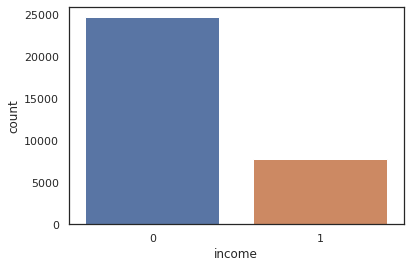

In [109]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")
plt.show()

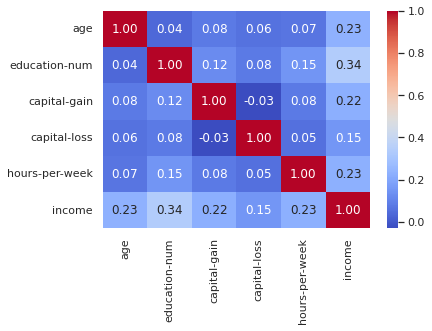

In [110]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


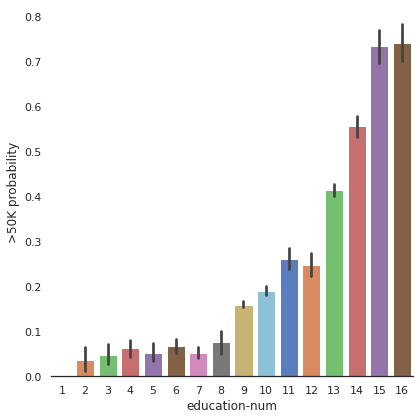

In [111]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

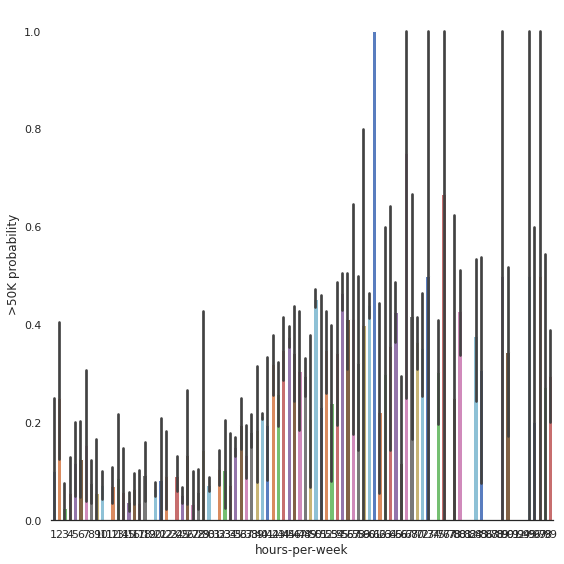

In [112]:
# Explore Hours Per Week vs Income
plt.figure(figsize=(8,8))
g  = sns.factorplot(x="hours-per-week",y="income",data=dataset,kind="bar",size = 8,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")
plt.show()

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


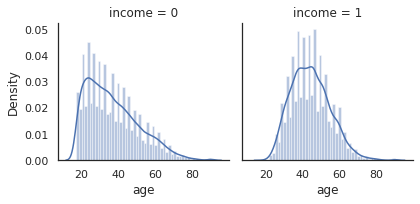

In [113]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
plt.show()

###3.2. Categorical Data Analysis

In [114]:
# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native-country"] = dataset["native-country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

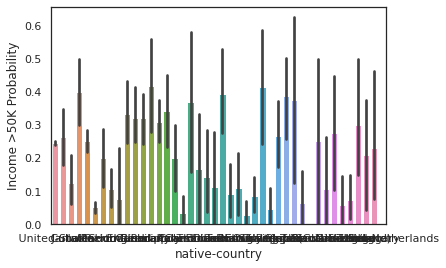

In [115]:
# Explore Native Nation vs Income
g = sns.barplot(x="native-country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

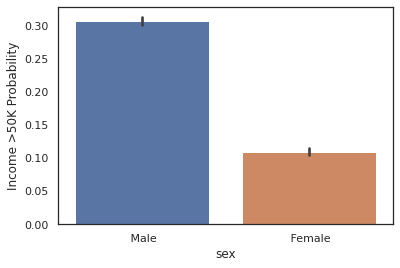

In [116]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


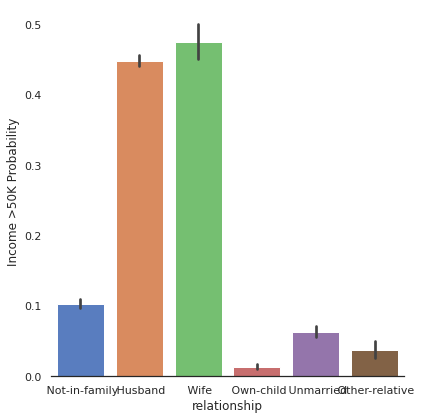

In [117]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


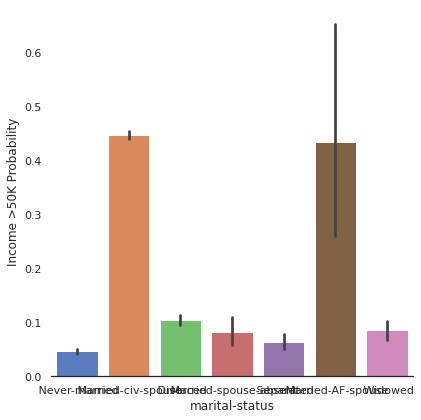

In [118]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/basit/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


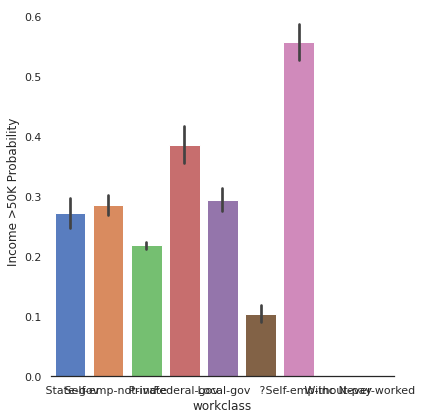

In [119]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

##4. Feature Engineering

In [120]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [121]:
dataset.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [122]:
# Convert Sex value to 0 and 1
dataset["sex"] = dataset["sex"].map({" Male": 0, " Female":1})

In [123]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [124]:
dataset['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [125]:

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital-status"] = dataset["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
dataset["marital-status"] = dataset["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
dataset["marital-status"] = dataset["marital-status"].map({"Married":1, "Single":0})


In [126]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,0,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,11th,7,1,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,Bachelors,13,1,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [127]:
dataset["marital-status"] = dataset["marital-status"].astype(int)
# dataset.head()

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  int64 
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 3.5+ MB


In [132]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [137]:
for i in dataset.columns:
    if dataset[i].dtype=='object':
        dataset[i]=encode.fit_transform(dataset[i])

In [138]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,13,0,1,1,4,0,2174,0,40,39,0
1,50,6,9,13,1,4,0,4,0,0,0,13,39,0
2,38,4,11,9,0,6,1,4,0,0,0,40,39,0
3,53,4,1,7,1,6,0,2,0,0,0,40,39,0
4,28,4,9,13,1,10,5,2,1,0,0,40,5,0


# PART 1 classification

In [140]:
###################################################
##################### MODELING #####################
####################################################
# Split-out Validation Dataset and Create Test Variables
array = dataset.values
X = array[:,0:-1]
Y = array[:,-1]
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size)

# Params for Random Forest
num_trees = 100
max_features = 3

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/basit/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/basit/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

LogisticRegression: 0.805897 (0.006466)
KNeighborsClassifier: 0.836034 (0.006829)
DecisionTreeClassifier: 0.816493 (0.005455)
GaussianNB: 0.804400 (0.005648)
RandomForestClassifier: 0.848971 (0.006106)


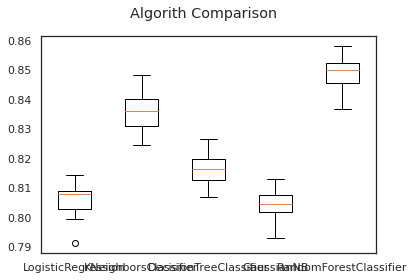

In [141]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Algorithm Tuning

In [144]:


n_estimator = 250
max_feature = 5
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.850584 using {'max_features': 4, 'n_estimators': 100}
0.844902 (0.004754) with: {'max_features': 1, 'n_estimators': 50}
0.845977 (0.005237) with: {'max_features': 1, 'n_estimators': 100}
0.846438 (0.005915) with: {'max_features': 1, 'n_estimators': 150}
0.846476 (0.005433) with: {'max_features': 1, 'n_estimators': 200}
0.846169 (0.006326) with: {'max_features': 1, 'n_estimators': 250}
0.849010 (0.006061) with: {'max_features': 2, 'n_estimators': 50}
0.847973 (0.004583) with: {'max_features': 2, 'n_estimators': 100}
0.848050 (0.005517) with: {'max_features': 2, 'n_estimators': 150}
0.848818 (0.005927) with: {'max_features': 2, 'n_estimators': 200}
0.849087 (0.005587) with: {'max_features': 2, 'n_estimators': 250}
0.848664 (0.005354) with: {'max_features': 3, 'n_estimators': 50}
0.848856 (0.006614) with: {'max_features': 3, 'n_estimators': 100}
0.850161 (0.005150) with: {'max_features': 3, 'n_estimators': 150}
0.848779 (0.005723) with: {'max_features': 3, 'n_estimators': 200}
0.8

## Finalize Model

In [145]:

random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.96852448948258%
[[4542  381]
 [ 598  992]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4923
           1       0.72      0.62      0.67      1590

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.84      0.85      0.85      6513



In [152]:
test=pd.read_csv("1650892873_2670815_adult_test_CS584.csv")

In [153]:
# Check for Null Data
test.isnull().sum()
test = test.fillna(np.nan)
# Identify Numeric features
numeric_features = ['age','education-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
test["workclass"] = test["workclass"].fillna("X")
test["occupation"] = test["occupation"].fillna("X")
test["native-country"] = test["native-country"].fillna("United-States")
# Convert Sex value to 0 and 1
test["sex"] = test["sex"].map({" Male": 0, " Female":1})

# Create Married Column - Binary Yes(1) or No(0)
test["marital-status"] = test["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
test["marital-status"] = test["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
test["marital-status"] = test["marital-status"].map({"Married":1, "Single":0})
test["marital-status"] = test["marital-status"].astype(int)
# dataset.head()
for i in test.columns:
    if test[i].dtype=='object':
        test[i]=encode.fit_transform(test[i])

In [154]:
# prediction for submission
predict=random_forest.predict(test)

In [155]:
predict

array([0, 0, 0, ..., 1, 0, 1])

In [156]:
df=pd.DataFrame(columns=[1],data=predict)

In [157]:
df.head()

,1
0,0
1,0
2,0
3,1
4,0


In [158]:
df.to_csv("submission.csv")

# PART 2

In [203]:
names = ['age','workclass','education','education-num',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

#Load dataset
df = pd.read_csv('1650892873_256509_adult_train_CS584.csv',names=names,na_values='?')
df = df.dropna()

In [204]:
#Snap shot of dataset
df[['age','education-num','marital-status','occupation',
    'hours-per-week','native-country',
    'race','sex','y']].head(10)

,age,education-num,marital-status,occupation,hours-per-week,native-country,race,sex,y
0,age,education-num,marital-status,occupation,hours-per-week,native-country,race,sex,income
1,39,13,Never-married,Adm-clerical,40,United-States,White,Male,<=50K
2,50,13,Married-civ-spouse,Exec-managerial,13,United-States,White,Male,<=50K
3,38,9,Divorced,Handlers-cleaners,40,United-States,White,Male,<=50K
4,53,7,Married-civ-spouse,Handlers-cleaners,40,United-States,Black,Male,<=50K
5,28,13,Married-civ-spouse,Prof-specialty,40,Cuba,Black,Female,<=50K
6,37,14,Married-civ-spouse,Exec-managerial,40,United-States,White,Female,<=50K
7,49,5,Married-spouse-absent,Other-service,16,Jamaica,Black,Female,<=50K
8,52,9,Married-civ-spouse,Exec-managerial,45,United-States,White,Male,>50K
9,31,14,Never-married,Prof-specialty,50,United-States,White,Female,>50K


Text(0.5, 1.0, 'Sex')

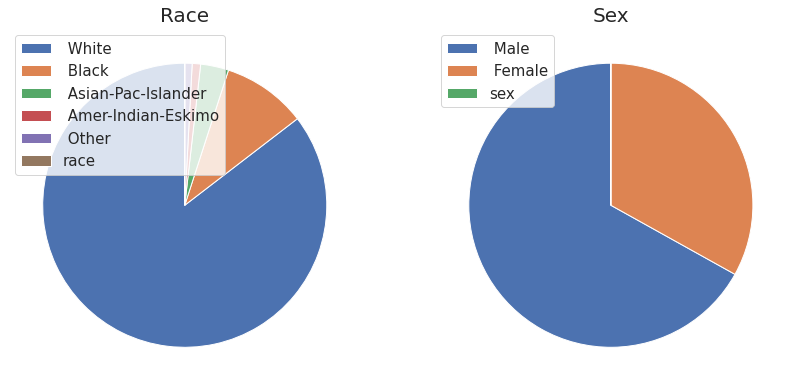

In [205]:
plt.figure(figsize=(14, 7))
plt.subplot(121)

#Plot breakdown by race
counts = df['race'].value_counts()
labels = counts.index

plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Race",size=20)

plt.subplot(122)

#Plot breakdown by sex
counts = df['sex'].value_counts()
labels = counts.index

plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Sex",size=20)



In [206]:
df_fair = df[['race','sex']]

#Define protected variables 
df_fair['priv_race'] = [1 if r=='White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s==' Male' else 0 for s in df_fair['sex']]

#Define target variable 
df_fair['y'] =  [1 if y == ' >50K'else 0 for y in df['y']]

df_fair.head()


/tmp/ipykernel_5346/4164740581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fair['priv_race'] = [1 if r=='White' else 0 for r in df_fair['race']]
/tmp/ipykernel_5346/4164740581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fair['priv_sex'] = [1 if s==' Male' else 0 for s in df_fair['sex']]
/tmp/ipykernel_5346/4164740581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,race,sex,priv_race,priv_sex,y
0,race,sex,0,0,0
1,White,Male,0,1,0
2,White,Male,0,1,0
3,White,Male,0,1,0
4,Black,Male,0,1,0


In [207]:
#Calculate prevelance
prev = df_fair['y'].mean()
prev_race = df_fair.groupby('priv_race')['y'].mean()
prev_sex = df_fair.groupby('priv_sex')['y'].mean()
prev_comb = df_fair.groupby(['priv_race','priv_sex'])['y'].mean()

print(prev)
print(prev_race)
print(prev_sex)
print(prev_comb)

0.24080216202935936
priv_race
0    0.240802
Name: y, dtype: float64
priv_sex
0    0.109450
1    0.305737
Name: y, dtype: float64
priv_race  priv_sex
0          0           0.109450
           1           0.305737
Name: y, dtype: float64


In [208]:
#Target variable 
y = [1 if y == '>50K' else 0 for y in df['y']]

#Model features
X = df[['age','education-num','hours-per-week']]
X['marital-status'] = [1 if x=='Married-civ-spouse' else 0 for x in df['marital-status']] 
X['native-country'] = [1 if x=='United-States' else 0 for x in df['native-country']] 

occ_groups = {
    'Priv-house-serv':0,'Other-service':0,'Handlers-cleaners':0,
    'Farming-fishing':1,'Machine-op-inspct':1,'Adm-clerical':1,
    'Transport-moving':2,'Craft-repair':2,'Sales':2,
    'Armed-Forces':3,'Tech-support':3,'Protective-serv':3,
    'Prof-specialty':4,'Exec-managerial':4}

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=encode.fit_transform(df[i])
X['occupation'] = df['occupation']
X.head()

/tmp/ipykernel_5346/166500636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital-status'] = [1 if x=='Married-civ-spouse' else 0 for x in df['marital-status']]
/tmp/ipykernel_5346/166500636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'] = [1 if x=='United-States' else 0 for x in df['native-country']]
/tmp/ipykernel_5346/166500636.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,age,education-num,hours-per-week,0,0,15
1,39,13,40,0,0,1
2,50,13,13,0,0,4
3,38,9,40,0,0,6
4,53,7,40,0,0,6


In [212]:
#Feature importance sex

# Get balanced sample 
y_sex_0 = df_fair[df_fair['priv_sex'] == 0]['priv_sex']
y_sex_1 = df_fair[df_fair['priv_sex'] == 1]['priv_sex']
y_sex_1 = y_sex_1.sample(len(y_sex_0))
y_sex = y_sex_0.append(y_sex_1)

X_sex = X.loc[y_sex.index]

X_sex.head()

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,age,education-num,hours-per-week,0,0,15
5,28,13,40,0,0,10
6,37,14,40,0,0,4
7,49,5,16,0,0,8
9,31,14,50,0,0,10


In [216]:
X_sex=X_sex.iloc[1:,:]

In [217]:
X_sex.head()

,age,education-num,hours-per-week,marital-status,native-country,occupation
5,28,13,40,0,0,10
6,37,14,40,0,0,4
7,49,5,16,0,0,8
9,31,14,50,0,0,10
13,23,13,30,0,0,1


In [220]:
y_sex=y_sex[1:]

In [222]:
#Train model and get predictions
model = RandomForestClassifier()
model.fit(X_sex, y_sex)

y_pred = model.predict(X_sex)

#Calculate accuracy 
acc_sex = accuracy_score(y_sex, y_pred)


#Output results 
print(acc_sex)
print(confusion_matrix(y_sex, y_pred))
print(classification_report(y_sex, y_pred))

0.8703987374089032
[[9573 1198]
 [1594 9178]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     10771
           1       0.88      0.85      0.87     10772

    accuracy                           0.87     21543
   macro avg       0.87      0.87      0.87     21543
weighted avg       0.87      0.87      0.87     21543



#  PART 3

In [224]:
df=pd.read_csv('1650892873_256509_adult_train_CS584.csv')

In [225]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=encode.fit_transform(df[i])

In [228]:
df.corr()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.003787,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
education,-0.010508,0.023513,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980
capital-gain,0.077674,0.033835,0.030046,0.122630,-0.043393,0.025505,-0.057919,0.011145,0.048480,1.000000,-0.031615,0.078409,-0.001982,0.223329


<AxesSubplot:>

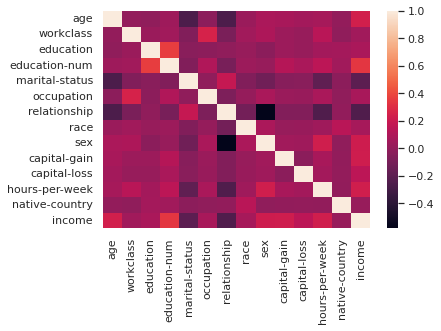

In [227]:
sns.heatmap(df.corr())

In [229]:
df.drop(['sex','race'],axis=1,inplace=True)

In [230]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,13,4,1,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,0,0,13,39,0
2,38,4,11,9,0,6,1,0,0,40,39,0
3,53,4,1,7,2,6,0,0,0,40,39,0
4,28,4,9,13,2,10,5,0,0,40,5,0


In [231]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [233]:
#Train model and get predictions
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#Calculate accuracy 
acc_sex = accuracy_score(y_test, y_pred)


#Output results 
print(acc_sex)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8464609243052357
[[4532  414]
 [ 586  981]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4946
           1       0.70      0.63      0.66      1567

    accuracy                           0.85      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513

